In [106]:
import pandas as pd

In [226]:
import numpy as np

In [562]:
playerplays = pd.read_csv("player_play.csv")
plays = pd.read_csv("plays.csv")
players = pd.read_csv("players.csv")

In [108]:
df = pd.read_csv("tracking_week_1.csv")

In [109]:
motionplayers = playerplays[['gameId','playId','motionSinceLineset']][playerplays['motionSinceLineset']==True]

In [110]:
motionplays = pd.merge(
    motionplayers,
    plays[['gameId','playId','passResult']],
    how = "left",
    on = ['gameId','playId']
)

In [111]:
motionplays = motionplays[motionplays['passResult'].notna()]

In [112]:
routeRunners = pd.merge(
    playerplays[['gameId','playId','nflId','motionSinceLineset','inMotionAtBallSnap','wasRunningRoute','wasTargettedReceiver']][playerplays['wasRunningRoute']==True],
    plays[['gameId','playId','down','yardsToGo','offenseFormation','receiverAlignment','pff_passCoverage','absoluteYardlineNumber',]],
    how = "left",
    left_on = ['gameId','playId'],
    right_on = ['gameId','playId']
)


In [113]:
motionRunners = routeRunners.merge(
    motionplays[['gameId', 'playId']].drop_duplicates(), 
    on=['gameId', 'playId'], 
    how='inner'
)

In [114]:
snappositions = df[['gameId','playId','nflId','y']][df['frameType']=="SNAP"]

In [115]:
snappositions

,gameId,playId,nflId,y
113,2022091200,64,35459.0,29.43
276,2022091200,64,39987.0,23.86
439,2022091200,64,41310.0,22.21
602,2022091200,64,42393.0,13.41
765,2022091200,64,42403.0,17.63
...,...,...,...,...
7103946,2022090800,3696,53678.0,44.13
7104121,2022090800,3696,54488.0,44.36
7104296,2022090800,3696,54554.0,35.23
7104471,2022090800,3696,54650.0,7.14


In [116]:
motionRunners = pd.merge(
    motionRunners,
    snappositions,
    how = "left",
    on = ['gameId','playId','nflId']
)

In [117]:
motionRunners

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
0,2022090800,56,42489,True,False,1.0,1,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65
1,2022090800,56,44985,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,18.20
2,2022090800,56,47879,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,34.37
3,2022090800,56,52536,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,8.25
4,2022090800,212,42818,False,False,1.0,0,2,9,SHOTGUN,2x2,Cover-1,44,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,2022110700,2496,54476,False,False,1.0,1,3,6,SHOTGUN,2x2,Cover-6 Right,51,NaN
16432,2022110700,3059,43415,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN
16433,2022110700,3059,52500,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN
16434,2022110700,3059,52609,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN


In [118]:
weekone = motionRunners[motionRunners['y'].notna()]

In [99]:
weekone[weekone['motionSinceLineset'].isna()]

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
1913,2022091110,673,40011,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,32.52
1914,2022091110,673,47839,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,26.99
1916,2022091110,673,53591,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,31.20
1917,2022091110,673,54519,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,14.57
2097,2022091111,232,40024,NaN,False,1.0,0,1,10,SINGLEBACK,3x1,Cover-2,84,22.91
2098,2022091111,232,44819,NaN,False,1.0,0,1,10,SINGLEBACK,3x1,Cover-2,84,37.92


In [119]:
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)

C:\Users\bhaga\AppData\Local\Temp\ipykernel_29716\1285583402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
C:\Users\bhaga\AppData\Local\Temp\ipykernel_29716\1285583402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)


In [480]:
linecoords = pd.read_csv("linecoods.csv")

In [484]:
weekone = pd.merge(
    weekone,
    linecoords[['gameId','playId','topOfLine','bottomOfLine']],
    how = "left",
    on = ['gameId','playId']
    )

In [564]:
weekone = pd.merge(
    weekone,
    players[['nflId','position']]
)

In [569]:
one = pd.DataFrame(columns=[
    'gameId', 'playId', 'down', 'yardsToGo', 'offenseFormation', 
    'pff_passCoverage', 'absoluteYardlineNumber', 'receiverAlignment',
    'firstY', 'secondY', 'thirdY', 'fourthY', 'fifthY', 'sixthY', 'rbPosition',
    'aboveLine', 'belowLine','motionReceiver', 'motionCluster', 'inMotionAtBallSnap', 
    'targetedReceiver', 'maxSeparationReceiver', 'nflId'
])

for _, i in weekone.iterrows():
    inone = ((one['gameId'] == i['gameId']) & (one['playId'] == i['playId'])).any()
    
    if not inone:
        play = weekone[(weekone['gameId'] == i['gameId']) & 
                       (weekone['playId'] == i['playId'])]
        play = play.sort_values(by='y', ascending=False)
        motion_players = play[play['motionSinceLineset']]  # Get motion players

        for _, motion_player in motion_players.iterrows():
            thisplay = [
                i['gameId'],
                i['playId'],
                i['down'], 
                i['yardsToGo'], 
                i['offenseFormation'],
                i['pff_passCoverage'], 
                i['absoluteYardlineNumber'],
                i['receiverAlignment']
            ]

            motionrec = 0
            targetrec = 0
            motionindex = 1
            targetindex = 1
            aboveline = 0
            belowline = 0
            moving = False
            rbindex = 0
            for _, j in play.iterrows():
                thisplay.append(j['y'])
                if j['y'] > j['topOfLine']:
                    aboveline += 1
                elif j['y'] < j['bottomOfLine']:
                    belowline += 1
                if j['motionSinceLineset']:
                    if j['nflId'] == motion_player['nflId']:  # Focus on specific motion player
                        motionrec = motionindex
                        if j['inMotionAtBallSnap']:
                            moving = True
                if j['position'] == 'RB':
                    rbindex = targetindex
                if j['wasTargettedReceiver']:
                    targetrec = targetindex
                motionindex += 1
                targetindex += 1

            while len(thisplay) < 14:
                thisplay.append(0)

            thisplay.extend([
                rbindex,
                aboveline,
                belowline,
                motionrec,
                0,  # Add motion cluster
                moving,
                targetrec,
                0,  # Find max separation receiver
                motion_player['nflId']
            ])
            
            new_row = pd.DataFrame([thisplay], columns=one.columns)
            one = pd.concat([one, new_row], ignore_index=True)


C:\Users\bhaga\AppData\Local\Temp\ipykernel_29716\2137688366.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  one = pd.concat([one, new_row], ignore_index=True)


In [570]:
one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,sixthY,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,0,0,2,2,1,0,False,1,0,42489
1,2022090800,550,2,3,SHOTGUN,Cover-3 Seam,94,2x2,38.71,34.35,...,0,3,2,2,1,0,True,0,0,42489
2,2022090800,569,3,4,SHOTGUN,Cover-3,95,2x2,34.99,34.61,...,0,3,2,2,1,0,True,1,0,42489
3,2022090800,617,1,10,SHOTGUN,Cover-3,74,2x1,34.55,25.55,...,0,0,1,1,3,0,True,3,0,44985
4,2022090800,1030,3,2,SHOTGUN,Cover-3,50,2x2,42.03,26.77,...,0,3,1,2,2,0,True,1,0,44985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022091200,3296,3,3,SHOTGUN,Red Zone,19,2x2,39.03,37.56,...,0,3,2,2,1,0,True,3,0,52423
685,2022091200,3382,2,8,SHOTGUN,Red Zone,18,2x2,37.49,33.27,...,0,3,2,2,2,0,True,4,0,46109
686,2022091200,3596,3,5,SHOTGUN,Cover-3,83,2x2,44.85,31.66,...,0,0,2,2,3,0,True,2,0,52423
687,2022091200,3723,3,2,SHOTGUN,Cover-3 Seam,70,2x2,39.21,36.37,...,0,3,2,2,1,0,False,3,0,52454


In [155]:
clusters = pd.read_csv('clusters.csv')

In [156]:
clusters[['gameId','playId','nflId','cluster']]

,gameId,playId,nflId,cluster
0,2022090800,56,42489.0,3.0
1,2022090800,80,47857.0,6.0
2,2022090800,212,47879.0,0.0
3,2022090800,236,52536.0,3.0
4,2022090800,299,44881.0,1.0
...,...,...,...,...
1134,2022091200,3382,46109.0,3.0
1135,2022091200,3491,46096.0,2.0
1136,2022091200,3553,52423.0,3.0
1137,2022091200,3596,52423.0,5.0


In [571]:
week_one = pd.merge(
    one,
    clusters[['gameId','playId','nflId','cluster']],
    how = "left",
    on = ['gameId','playId', 'nflId']
)

In [572]:
week_one['motionCluster'] = week_one['cluster']

In [573]:
week_one[week_one['motionCluster'].isna()]

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster
8,2022090800,2572,2,9,SHOTGUN,Cover-3 Seam,76,2x2,43.19,36.45,...,3,2,0,5,NaN,True,3,0,53079,NaN
14,2022090800,2934,1,10,SHOTGUN,Cover-3 Seam,51,2x1,44.25,32.21,...,3,1,2,4,NaN,False,3,0,44985,NaN
17,2022090800,721,2,7,SHOTGUN,Cover-3,39,2x2,46.86,34.36,...,0,2,2,1,NaN,False,1,0,44985,NaN
20,2022090800,1102,2,6,SHOTGUN,Quarters,85,3x1,37.98,33.43,...,2,2,3,2,NaN,False,2,0,52494,NaN
31,2022090800,1286,1,10,SINGLEBACK,Cover-2,46,2x2,32.75,28.78,...,0,2,1,3,NaN,True,2,0,53486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,2022091200,264,1,10,SINGLEBACK,Quarters,99,3x1,34.59,28.23,...,3,2,1,4,NaN,True,4,0,48096,NaN
665,2022091200,286,2,10,I_FORM,Cover-6 Right,99,2x1,33.93,23.84,...,2,1,1,3,NaN,True,3,0,48096,NaN
666,2022091200,346,2,1,SINGLEBACK,Cover-6 Right,65,2x2,38.12,35.07,...,3,1,0,2,NaN,False,2,0,48096,NaN
678,2022091200,2591,1,10,SHOTGUN,Cover 6-Left,78,3x1,43.01,27.24,...,2,1,4,4,NaN,False,1,0,44987,NaN


In [574]:
week_one = week_one.drop(columns = ['cluster', 'nflId'])

In [575]:
week_one = week_one.dropna(subset=['motionCluster'])

In [576]:
week_one

,gameId,playId,down,yardsToGo,offenseFormation,pff_passCoverage,absoluteYardlineNumber,receiverAlignment,firstY,secondY,...,fifthY,sixthY,rbPosition,aboveLine,belowLine,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver
0,2022090800,56,1,10,SHOTGUN,Cover 6-Left,85,2x2,43.65,34.37,...,0,0,0,2,2,1,3.0,False,1,0
1,2022090800,550,2,3,SHOTGUN,Cover-3 Seam,94,2x2,38.71,34.35,...,11.33,0,3,2,2,1,3.0,True,0,0
2,2022090800,569,3,4,SHOTGUN,Cover-3,95,2x2,34.99,34.61,...,10.38,0,3,2,2,1,5.0,True,1,0
3,2022090800,617,1,10,SHOTGUN,Cover-3,74,2x1,34.55,25.55,...,0,0,0,1,1,3,5.0,True,3,0
4,2022090800,1030,3,2,SHOTGUN,Cover-3,50,2x2,42.03,26.77,...,9.36,0,3,1,2,2,6.0,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022091200,3296,3,3,SHOTGUN,Red Zone,19,2x2,39.03,37.56,...,9.12,0,3,2,2,1,5.0,True,3,0
685,2022091200,3382,2,8,SHOTGUN,Red Zone,18,2x2,37.49,33.27,...,9.71,0,3,2,2,2,3.0,True,4,0
686,2022091200,3596,3,5,SHOTGUN,Cover-3,83,2x2,44.85,31.66,...,0,0,0,2,2,3,5.0,True,2,0
687,2022091200,3723,3,2,SHOTGUN,Cover-3 Seam,70,2x2,39.21,36.37,...,10.78,0,3,2,2,1,3.0,False,3,0


In [577]:
week_one = week_one[week_one['targetedReceiver']!=0]

In [320]:
import seaborn as sns
import matplotlib as plt

Modeling

In [583]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','maxSeparationReceiver'])

In [586]:
y = week_one['targetedReceiver']

In [584]:
X = pd.get_dummies(X_original, columns=['down','offenseFormation','receiverAlignment','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
#X = pd.get_dummies(X, columns=['down','offenseFormation','receiverAlignment','pff_passCoverage','motionReceiver'])

In [587]:
y = y.astype("category")

Random Forest

In [638]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [657]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','receiverAlignment','pff_passCoverage','maxSeparationReceiver'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','motionReceiver','motionCluster'])

In [658]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [659]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [650]:
feature_importances = rf.feature_importances_
important = pd.DataFrame()
for name, importance in zip(X.columns, feature_importances):
    important = pd.concat([important, pd.DataFrame({'Name': [name], 'Importance': [importance]})], ignore_index=True)

important = important.sort_values(by='Importance', ascending=False)

In [660]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.33663366336633666
Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.43      0.38        21
           2       0.41      0.39      0.40        28
           3       0.21      0.29      0.24        17
           4       0.27      0.25      0.26        16
           5       0.56      0.26      0.36        19

    accuracy                           0.34       101
   macro avg       0.36      0.33      0.33       101
weighted avg       0.37      0.34      0.34       101



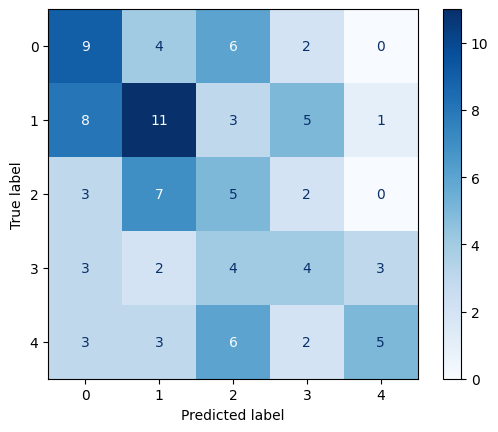

In [651]:
cm_best = confusion_matrix(y_test, y_pred)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')

In [661]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [207]:
from sklearn.model_selection import GridSearchCV

In [662]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)


In [663]:
model_grid = RandomForestClassifier(max_depth=9, 
                                    max_features=None, 
                                    max_leaf_nodes=9,
                                    n_estimators=150) 
model_grid.fit(X_train, y_train) 

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=150)

In [664]:
y_pred_grid = model_grid.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_pred_grid, y_test)) 

Accuracy: 0.33663366336633666
              precision    recall  f1-score   support

           1       0.24      0.29      0.26        17
           2       0.57      0.42      0.48        38
           3       0.24      0.16      0.19        25
           4       0.12      0.33      0.18         6
           5       0.26      0.33      0.29        15

    accuracy                           0.32       101
   macro avg       0.29      0.31      0.28       101
weighted avg       0.36      0.32      0.33       101



Logistic Regression

In [637]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [766]:
X_original = week_one.drop(columns=['gameId','playId','receiverAlignment','targetedReceiver','maxSeparationReceiver'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [767]:
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [768]:
y_pred = log_model.predict(X_test)

In [756]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': log_model.coef_[0]  # For binary classification, use model.coef_
})

# For multiclass classification, handle multiple sets of coefficients
if log_model.coef_.shape[0] > 1:
    for i, class_coef in enumerate(log_model.coef_):
        feature_importances[f'Class_{i}'] = class_coef

# Sort by absolute importance for a given class (optional)
feature_importances['Absolute_Importance'] = feature_importances['Importance'].abs()
feature_importances = feature_importances.sort_values(by='Absolute_Importance', ascending=False)


In [757]:
feature_importances.head(60)

,Feature,Importance,Class_0,Class_1,Class_2,Class_3,Class_4,Absolute_Importance
42,motionReceiver_1,0.783789,0.783789,-0.179683,-0.154706,-0.434606,-0.014794,0.783789
47,motionCluster_0.0,-0.774073,-0.774073,-0.158831,0.106635,0.541056,0.285213,0.774073
53,motionCluster_6.0,0.692955,0.692955,0.411070,0.230132,0.082201,-1.416358,0.692955
46,motionReceiver_5,-0.583699,-0.583699,-0.137067,0.037786,0.280573,0.402407,0.583699
45,motionReceiver_4,-0.503845,-0.503845,-0.047222,-0.231862,0.503289,0.279639,0.503845
16,offenseFormation_I_FORM,0.457168,0.457168,-0.111726,0.149188,-0.535571,0.040940,0.457168
14,down_4,0.455090,0.455090,0.041084,0.559606,-0.875734,-0.180046,0.455090
43,motionReceiver_2,0.416436,0.416436,0.452770,0.198693,-0.481568,-0.586331,0.416436
37,pff_passCoverage_Cover-3 Seam,0.408002,0.408002,-0.323375,0.766134,-0.240737,-0.610025,0.408002
21,rbPosition_0,0.405808,0.405808,-0.076657,0.032623,0.375134,-0.736907,0.405808


In [769]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.32673267326732675
Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.29      0.32        21
           2       0.35      0.29      0.31        28
           3       0.17      0.24      0.20        17
           4       0.30      0.44      0.36        16
           5       0.50      0.42      0.46        19

    accuracy                           0.33       101
   macro avg       0.34      0.33      0.33       101
weighted avg       0.35      0.33      0.33       101



SVM

In [251]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [666]:
X_original = week_one.drop(columns=['gameId','playId','targetedReceiver','maxSeparationReceiver'])
X = pd.get_dummies(X_original, columns=['down','offenseFormation','rbPosition','pff_passCoverage','motionReceiver','motionCluster'])
X = X.drop(columns=['receiverAlignment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [667]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [668]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.25742574257425743
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.30      0.61      0.40        28
           3       0.20      0.53      0.30        17
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        19

    accuracy                           0.26       101
   macro avg       0.10      0.23      0.14       101
weighted avg       0.12      0.26      0.16       101



c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

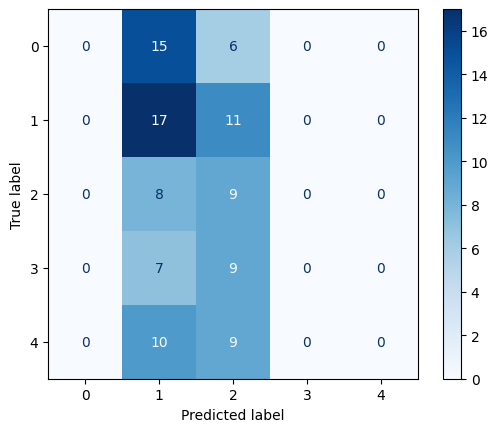

In [626]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [705]:
X_original = week_one.drop(columns=['gameId','playId','down','offenseFormation','motionReceiver','targetedReceiver','pff_passCoverage','maxSeparationReceiver'])
X = pd.get_dummies(X_original, columns=['rbPosition','motionCluster'])
X = X.drop(columns=['receiverAlignment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [690]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'], 
    'kernel': ['rbf', 'linear']
}

In [706]:
grid_search = GridSearchCV(SVC(decision_function_shape='ovr', random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.3159876543209877


In [708]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(grid_search, X_test, y_test, scoring='accuracy', n_repeats=30, random_state=42)

importances = perm_importance.importances_mean
stds = perm_importance.importances_std
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances,
    'StdDev': stds
}).sort_values(by='Importance', ascending=False)

In [709]:
importance_df

,Feature,Importance,StdDev
6,fifthY,0.077888,0.023393
1,absoluteYardlineNumber,0.068977,0.037439
3,secondY,0.050165,0.022129
4,thirdY,0.050165,0.025428
0,yardsToGo,0.049835,0.023218
2,firstY,0.033663,0.021019
9,belowLine,0.023432,0.010689
8,aboveLine,0.023102,0.009335
14,rbPosition_3,0.021452,0.010871
13,rbPosition_2,0.020462,0.006731


In [707]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.33663366336633666
Classification Report:
               precision    recall  f1-score   support

           1       0.36      0.19      0.25        21
           2       0.34      0.71      0.46        28
           3       0.28      0.29      0.29        17
           4       0.33      0.19      0.24        16
           5       0.50      0.11      0.17        19

    accuracy                           0.34       101
   macro avg       0.36      0.30      0.28       101
weighted avg       0.36      0.34      0.30       101



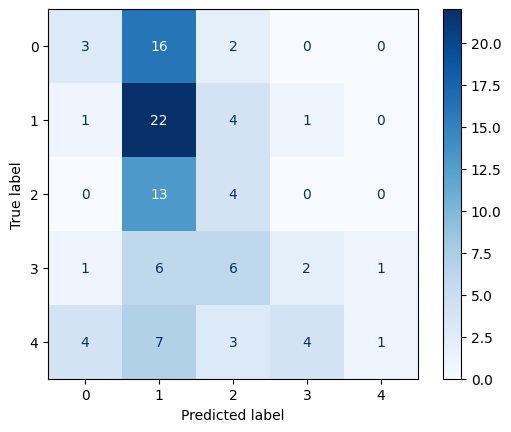

In [698]:
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')